## Style-Your-Hair 불러오기

https://github.com/Taeu/Style-Your-Hair

In [1]:
!git clone https://github.com/Taeu/Style-Your-Hair.git
!cd Style-Your-Hair

fatal: destination path 'Style-Your-Hair' already exists and is not an empty directory.


In [2]:
# !conda create -n {env} python=3.7.9
# !conda activate {env}
# !conda install --yes pytorch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0 cudatoolkit=11.1 -c pytorch -c conda-forge
!pip install face_alignment face-recognition gdown ipython matplotlib

  Using cached face_alignment-1.3.5.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached gdown-4.6.4-py3-none-any.whl (14 kB)
  Using cached matplotlib-3.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 77.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 30.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 17.3 MB/s eta 0:00:00
  Using cached numba-0.56.4-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 96.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 20.7 MB/s e

In [3]:
!pip install ninja
# !unzip /content/Style-Your-Hair/ninja-linux.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.7 MB/s eta 0:00:00


## Real-ESRGAN 불러오기

In [ ]:
!pip install git+https://github.com/sberbank-ai/Real-ESRGAN.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sberbank-ai/Real-ESRGAN.git to /tmp/pip-req-build-vmure5pz
  Running command git clone --filter=blob:none --quiet https://github.com/sberbank-ai/Real-ESRGAN.git /tmp/pip-req-build-vmure5pz
  Resolved https://github.com/sberbank-ai/Real-ESRGAN.git to commit 362a0316878f41dbdfbb23657b450c3353de5acf
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 5.5 MB/s eta 0:00:00
  Created wheel for RealESRGAN: filename=RealESRGAN-1.0-py3-none-any.whl size=9135 sha256=c156798b440913fcf6b0e3251fa98b5c08044da71d98ac7cd7f76bf46d856ea6
  Stored in directory: /tmp/pip-ephem-wheel-cache-2viajat7/wheels/c0/01/e8/75182eda1345ba06ce17ba42cdf548f70e87623d9cc97a56c3
Successfully built RealESRGAN


In [ ]:
import os
import torch
from PIL import Image
import numpy as np
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('weights/RealESRGAN_x4.pth', download=True)

os.makedirs('inputs')

/usr/local/lib/python3.8/dist-packages/huggingface_hub/file_download.py:629: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


Weights downloaded to: weights/RealESRGAN_x4.pth


## 사진 파일 불러오기

In [7]:
%cd /home/aiku/AIKU/hair/Style-Your-Hair
# !unzip -qq "/content/drive/MyDrive/Colab Notebooks/AIKU/new_input_ffhq.zip"

from PIL import Image
import os

# os.mkdir('./ffhq_image', exist_ok = True)

/home/aiku/AIKU/hair/Style-Your-Hair


TypeError: 'exist_ok' is an invalid keyword argument for mkdir()

In [4]:
# source image(사용자 이미지)
img1 = Image.open('/home/aiku/AIKU/hair/source3.png')
img1 = img1.resize((1024, 1024))
img1.save('/home/aiku/AIKU/hair/Style-Your-Hair/ffhq_image/source.png')

In [5]:
# target image(헤어스타일 이미지)
img2 = Image.open('/home/aiku/AIKU/hair/target7.png')
img2 = img2.resize((1024, 1024))
img2.save('./ffhq_image/target.png')

In [9]:
# path_to_image = 'inputs/target.png'
image = Image.open('/home/aiku/AIKU/hair/Style-Your-Hair/ffhq_image/target.png').convert('RGB')
sr_image = model.predict(image)

sr_image.save('./ffhq_image/target.png')

NameError: name 'model' is not defined

In [11]:
!pip install matplotlib

  Using cached matplotlib-3.7.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (299 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


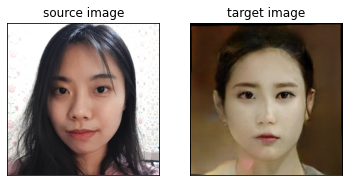

In [12]:
import matplotlib.pyplot as plt

# os.chdir('/content/Style-Your-Hair')

img1 = Image.open('./ffhq_image/source.png')
img2 = Image.open('./ffhq_image/target.png')

imgs = [img1, img2]
for i in range(2) : 
    image_index = i + 1
    plt.subplot(1, 2, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    else:
      plt.title('target image')
    plt.xticks([])  # x = None 
    plt.yticks([])  # y = None
    plt.imshow(imgs[i])
plt.show()

## style 변환

In [ ]:
!pip install s

In [10]:
!python main.py --input_dir ./ffhq_image/ --im_path1 source.png --im_path2 target.png \
    --output_dir ./style_your_hair_output/ \
    --warp_loss_with_prev_list delta_w style_hair_slic_large \
    --save_all --version final --flip_check

Loading StyleGAN2 from checkpoint: pretrained_models/ffhq.pt
torch.Size([512])
Setting up Perceptual loss...
/home/aiku/AIKU/anaconda3/envs/hair/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aiku/AIKU/anaconda3/envs/hair/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading model from: /home/aiku/AIKU/hair/Style-Your-Hair/losses/lpips/weights/v0.1/vgg.pth
...[net-lin [vgg]] initialized
...Done
Traceback (most recent call last):
  File "/home/aiku/AIKU/hair/Style-Your-Hair/main.py", line 1

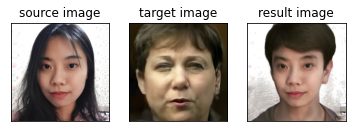

<Figure size 432x576 with 0 Axes>

In [ ]:
img3 = Image.open('/content/Style-Your-Hair/style_your_hair_output/source_target_flip.png')
imgs = [img1, img2, img3]

for i in range(3) : 
    image_index = i + 1
    plt.subplot(1, 3, image_index) # subplot 
    if i == 0:
      plt.title('source image')
    elif i == 1:
      plt.title('target image')
    elif i == 2:
      plt.title('result image')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i])  
plt.figure(figsize=(6,8))
plt.show()